# <center> Aspectos Basicos no Tratamento de Dados </center>

## Basic ToolBox - Tratamento de Dados I

In [24]:
import pandas as pd
import numpy as np

In [25]:
## Carregando Dados em DataFrame para exemplificação
df_sales = pd.read_csv('nyc-rolling-sales_twentieth.csv')
df_sales.drop(columns=['Unnamed: 0'], inplace=True)
df_sales.head(3)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00


## <center> Checagem dos Tipos de Dados </center>

In [26]:
# Verificando os Tipos de Dados em Cada Variavel
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16909 entries, 0 to 16908
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         16909 non-null  int64 
 1   NEIGHBORHOOD                    16909 non-null  object
 2   BUILDING CLASS CATEGORY         16909 non-null  object
 3   TAX CLASS AT PRESENT            16909 non-null  object
 4   BLOCK                           16909 non-null  int64 
 5   LOT                             16909 non-null  int64 
 6   EASE-MENT                       16909 non-null  object
 7   BUILDING CLASS AT PRESENT       16909 non-null  object
 8   ADDRESS                         16909 non-null  object
 9   APARTMENT NUMBER                16909 non-null  object
 10  ZIP CODE                        16909 non-null  int64 
 11  RESIDENTIAL UNITS               16909 non-null  int64 
 12  COMMERCIAL UNITS                16909 non-null

In [ ]:
# Definndo uma função python 
def string2float(value):
    if ',' in val:
        return float(value.replace(',', ''))
    else:
        return float(value)
# transformando dados do tipo "string(object)" para o tipo "float"

In [27]:
# Definndo uma função python 
def my_numeric(value):
    return pd.to_numeric(value, errors = 'coerce')
# Transformando dados do tipo "object (string)" para o tipo "numeric (float)"

# Combinando a função "map" com a função "my_numeric"  
print(df_sales['GROSS SQUARE FEET'].map(my_numeric))#.dtypes)


0         6440.0
1        18690.0
2         7803.0
3         6794.0
4         4615.0
          ...   
16904        NaN
16905        NaN
16906        NaN
16907        NaN
16908        NaN
Name: GROSS SQUARE FEET, Length: 16909, dtype: float64


In [28]:
#Transformando em numericas algumas variaveis que estão com tipo "object"
for colunas in ['SALE PRICE', 'GROSS SQUARE FEET', 'LAND SQUARE FEET', 'APARTMENT NUMBER']:
    df_sales[colunas] = pd.to_numeric(df_sales[colunas], errors = 'coerce')
print(df_sales.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16909 entries, 0 to 16908
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         16909 non-null  int64  
 1   NEIGHBORHOOD                    16909 non-null  object 
 2   BUILDING CLASS CATEGORY         16909 non-null  object 
 3   TAX CLASS AT PRESENT            16909 non-null  object 
 4   BLOCK                           16909 non-null  int64  
 5   LOT                             16909 non-null  int64  
 6   EASE-MENT                       16909 non-null  object 
 7   BUILDING CLASS AT PRESENT       16909 non-null  object 
 8   ADDRESS                         16909 non-null  object 
 9   APARTMENT NUMBER                1156 non-null   float64
 10  ZIP CODE                        16909 non-null  int64  
 11  RESIDENTIAL UNITS               16909 non-null  int64  
 12  COMMERCIAL UNITS                

## <center> Dados Faltantes / Nulos </center>

## Tratamento de Dados Faltantes

* Preencher com Estatística (Moda para Categorica, Mediana ou Média)
* Preencher com Alguma Regra Referente ao Negócio
* Exclusão

In [29]:
# Verificando a existencia de valores nulos /  ausentes
print(df_sales.isnull().sum())
# Somando todos os valores nulos existentes em cada variavel do DataSet

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                  15753
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  15178
GROSS SQUARE FEET                 15288
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                         3514
SALE DATE                             0
dtype: int64


In [30]:
# Verificando a existencia de valores nulos /  ausentes
print(df_sales.isnull().sum() / len(df_sales))
# Transformando em  porcentagem a existencia de valorwes nulos / ausentes

BOROUGH                           0.000000
NEIGHBORHOOD                      0.000000
BUILDING CLASS CATEGORY           0.000000
TAX CLASS AT PRESENT              0.000000
BLOCK                             0.000000
LOT                               0.000000
EASE-MENT                         0.000000
BUILDING CLASS AT PRESENT         0.000000
ADDRESS                           0.000000
APARTMENT NUMBER                  0.931634
ZIP CODE                          0.000000
RESIDENTIAL UNITS                 0.000000
COMMERCIAL UNITS                  0.000000
TOTAL UNITS                       0.000000
LAND SQUARE FEET                  0.897628
GROSS SQUARE FEET                 0.904134
YEAR BUILT                        0.000000
TAX CLASS AT TIME OF SALE         0.000000
BUILDING CLASS AT TIME OF SALE    0.000000
SALE PRICE                        0.207818
SALE DATE                         0.000000
dtype: float64


In [31]:
# Criando um DataFrame para exemplificação 
df = pd.DataFrame(data=[[np.nan, 1, 2, np.nan, 5],
                  [6, 7 ,8, 9, np.nan], [np.nan, np.nan, 4, 11, 12]], columns=['A', 'B', 'C', 'D', 'E'])
display(df)

,A,B,C,D,E
0,NaN,1.0,2,NaN,5.0
1,6.0,7.0,8,9.0,NaN
2,NaN,NaN,4,11.0,12.0


In [32]:
# Verificando valores nulos ou ausentes
df.isnull().sum()

A    2
B    1
C    0
D    1
E    1
dtype: int64

## ``dropna`` DataFrame Pandas

* Remova os valores ausentes.

In [33]:
# Aplicando a função dropna para execluir linhas ou colunas com valores nulos
porcentagem = 60
df.dropna(thresh=porcentagem*(len(df)/100), axis=1)

,B,C,D,E
0,1.0,2,NaN,5.0
1,7.0,8,9.0,NaN
2,NaN,4,11.0,12.0


## ``fillna`` DataFrame Pandas

* Preencha os valores NA/NaN usando o método especificado.

In [34]:
# Preencher Valores Nulos com zero 
df.fillna(0)

,A,B,C,D,E
0,0.0,1.0,2,0.0,5.0
1,6.0,7.0,8,9.0,0.0
2,0.0,0.0,4,11.0,12.0


## ``interpolate`` DataFrame / Series Pandas

* Preencha os valores NaN usando um método de interpolação.

In [134]:
# df.interpolate(method = )

In [35]:
# Preenchendo com a média e com zero
df.fillna({'A': np.mean(df['A']), 'B':0, 'D':0 , 'E':np.mean(df['E'])})

,A,B,C,D,E
0,6.0,1.0,2,0.0,5.0
1,6.0,7.0,8,9.0,8.5
2,6.0,0.0,4,11.0,12.0


## ``cut``  Pandas

* Valores bin em intervalos discretos. Use cut quando precisar segmentar e classificar valores de dados em compartimentos. Esta função também é útil para passar de uma variável contínua para uma variável categórica

In [36]:
# Criando um DataFrame para exemplificação
dr = [{'L':20, 'K':10, 'G':40}]
drr = pd.DataFrame(dr)

# Criar um intervalo igualmente espaçado
print(pd.cut(drr['K'], bins=5))

# Criando uma nova coluna com o intervalo igualmente espaçado
drr['Nova_col'] = pd.cut(drr['K'], bins=5)
display(drr)

0    (9.998, 10.002]
Name: K, dtype: category
Categories (5, interval[float64, right]): [(9.99, 9.994] < (9.994, 9.998] < (9.998, 10.002] < (10.002, 10.006] < (10.006, 10.01]]


,L,K,G,Nova_col
0,20,10,40,"(9.998, 10.002]"


## <center> Remover Dados Redundantes, Duplicados. </center>

In [37]:
# 1º Verificando Dados Duplicados
print(df_sales.duplicated().sum())
# Existem 200 registros de duplicaidade

200


In [38]:
# Removendo dados em Duplicidade
df_sales.drop_duplicates(inplace=True)

In [39]:
# Reordenando os índices
df_sales.reset_index(drop=True, inplace=True)

In [40]:
# 2º Verificando Dados Duplicados
print(df_sales.duplicated().sum())
# Foram removidos todos os registros em duplicidade
# Somente permanecendo o primeiro regsitro de cada duplicidade, redundancia

0


## <center> Removendo Colunas Constantes </center>

In [41]:
# Verificar a existencia de dados constantes no DataSet
colunas_const = []
for col in df_sales.columns:
    if len(df_sales[col].unique()) == 1:
        colunas_const.append(col)
    else:
        print(f'{col} Ok')
# A maior parte do DataSet possui colunas sem valores constantes

# Verificando a ocorrencia de colunas com valores constantes
print(f'\nExistem {len(colunas_const)} ocorrencia(s) e são: {colunas_const} ')
# Existem 2 ocorrencia de colunas com valores constantes

NEIGHBORHOOD Ok
BUILDING CLASS CATEGORY Ok
TAX CLASS AT PRESENT Ok
BLOCK Ok
LOT Ok
BUILDING CLASS AT PRESENT Ok
ADDRESS Ok
APARTMENT NUMBER Ok
ZIP CODE Ok
RESIDENTIAL UNITS Ok
COMMERCIAL UNITS Ok
TOTAL UNITS Ok
LAND SQUARE FEET Ok
GROSS SQUARE FEET Ok
YEAR BUILT Ok
TAX CLASS AT TIME OF SALE Ok
BUILDING CLASS AT TIME OF SALE Ok
SALE PRICE Ok
SALE DATE Ok

Existem 2 ocorrencia(s) e são: ['BOROUGH', 'EASE-MENT'] 


In [42]:
# Removendo as colunas constantes
df_sales.drop(columns=['BOROUGH','EASE-MENT'], inplace=True)

In [43]:
# Verificar a existencia de dados constantes no DataSet
colunas_const = []
for col in df_sales.columns:
    if len(df_sales[col].unique()) == 1:
        colunas_const.append(col)
    else:
        print(f'{col} Ok')

# Verificando a ocorrencia de colunas com valores constantes
print(f'\nExistem {len(colunas_const)} ocorrencia(s) e são: {colunas_const} ')

NEIGHBORHOOD Ok
BUILDING CLASS CATEGORY Ok
TAX CLASS AT PRESENT Ok
BLOCK Ok
LOT Ok
BUILDING CLASS AT PRESENT Ok
ADDRESS Ok
APARTMENT NUMBER Ok
ZIP CODE Ok
RESIDENTIAL UNITS Ok
COMMERCIAL UNITS Ok
TOTAL UNITS Ok
LAND SQUARE FEET Ok
GROSS SQUARE FEET Ok
YEAR BUILT Ok
TAX CLASS AT TIME OF SALE Ok
BUILDING CLASS AT TIME OF SALE Ok
SALE PRICE Ok
SALE DATE Ok

Existem 0 ocorrencia(s) e são: [] 


## <center> Unificar DataFrames </center>

## ``merge`` DataFrame Pandas

Mesclar objetos DataFrame ou Series nomeados com uma junção no estilo de banco de dados. Um objeto Series nomeado é tratado como um DataFrame com uma única coluna nomeada. A junção é feita em colunas ou índices. Se unir colunas em colunas, os índices do DataFrame serão ignorados. Caso contrário, se juntar índices em índices ou índices em uma coluna ou colunas, o índice será transmitido. Ao realizar uma mesclagem cruzada, nenhuma especificação de coluna para mesclar é permitido. Se ambas as colunas-chave contiverem linhas em que a chave for um valor nulo, essas as linhas serão comparadas entre si. Isso é diferente do SQL normal aderir ao comportamento e pode levar a resultados inesperados.

* **left** dataframe da esquerda
* **right** dataframe da direita
* **on** nome da coluna (ou lista) usadas para fazer o match
* **how** metodo utilizado

In [44]:
# Craindo dataframe para exemplificação (left_data_frame)
left_dataframe = pd.DataFrame({'ID':[1,2,3,4], 
                               'left_side':'LEFT'})
display(left_dataframe)

,ID,left_side
0,1,LEFT
1,2,LEFT
2,3,LEFT
3,4,LEFT


In [46]:
# Craindo dataframe para exemplificação (right_data_frame)
right_dataframe = pd.DataFrame({
    'ID':[3,4,5,6],
    'right_side':'RIGHT'
})
display(right_dataframe)

,ID,right_side
0,3,RIGHT
1,4,RIGHT
2,5,RIGHT
3,6,RIGHT


## Left merge

* Preserva os dados do dataframe da esquerda e adiciona informações do dataframe da direita que possua a mesma chave em comum.

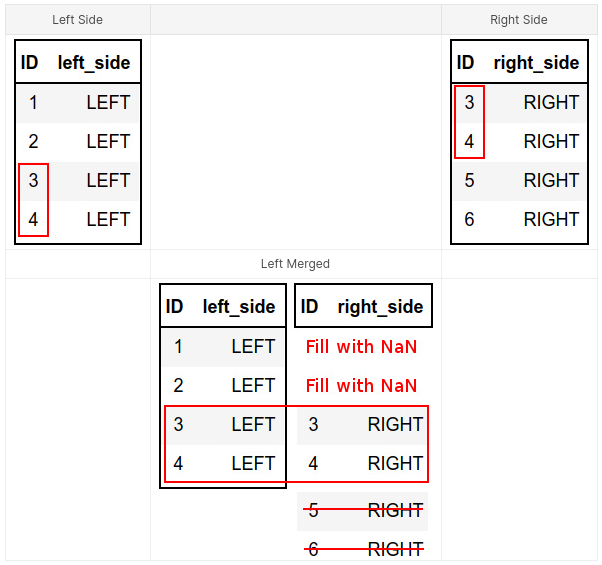

In [48]:
# Unificando os DataFrames "left_dataframe" e "right_dataframe"
merge_dataframe = pd.merge(
    left = left_dataframe, 
    right = right_dataframe,
    on = 'ID',
    how = 'left'    
)# Aplicando a função pandas "merge com left"
display(merge_dataframe)

,ID,left_side,right_side
0,1,LEFT,NaN
1,2,LEFT,NaN
2,3,LEFT,RIGHT
3,4,LEFT,RIGHT


In [51]:
# Unificando os DataFrames "right_dataframe" e "left_dataframe" 
merge_dataframe = pd.merge(
    left =  right_dataframe,
    right = left_dataframe,
    on = 'ID',
    how = 'left'    
)# Aplicando a função pandas "merge com left"
display(merge_dataframe)

,ID,right_side,left_side
0,3,RIGHT,LEFT
1,4,RIGHT,LEFT
2,5,RIGHT,NaN
3,6,RIGHT,NaN


## right merge

* Igual ao left merge, mas preservando o dataframe da direita

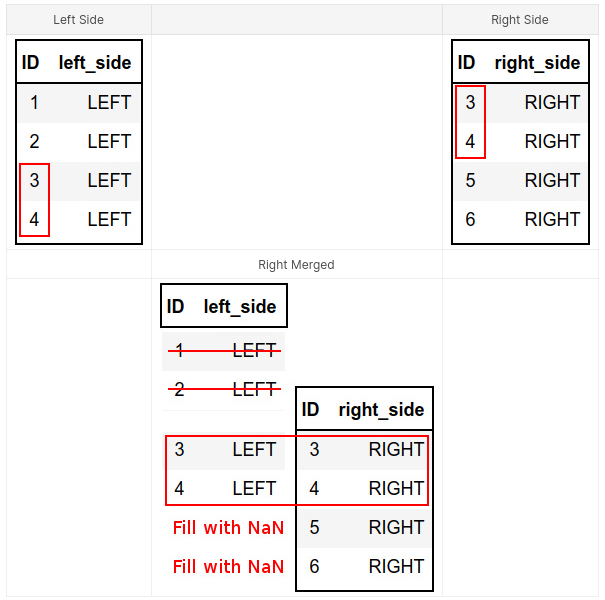

In [50]:
# Unificando os DataFrames "left_dataframe" e "right_dataframe"
merge_dataframe = pd.merge(
    left = left_dataframe, 
    right = right_dataframe,
    on = 'ID',
    how = 'right'    
)# Aplicando a função pandas "merge com right"
display(merge_dataframe)

,ID,left_side,right_side
0,3,LEFT,RIGHT
1,4,LEFT,RIGHT
2,5,NaN,RIGHT
3,6,NaN,RIGHT


In [49]:
# Unificando os DataFrames "right_dataframe" e "left_dataframe" 
merge_dataframe = pd.merge(
    left =  right_dataframe,
    right = left_dataframe,
    on = 'ID',
    how = 'right'    
)# Aplicando a função pandas "merge com right"
display(merge_dataframe)

,ID,right_side,left_side
0,1,NaN,LEFT
1,2,NaN,LEFT
2,3,RIGHT,LEFT
3,4,RIGHT,LEFT


## Inner merge

* Usa apenas o que existe em comum entre os dois dataframes. Não vai adicionar NaNs / Null

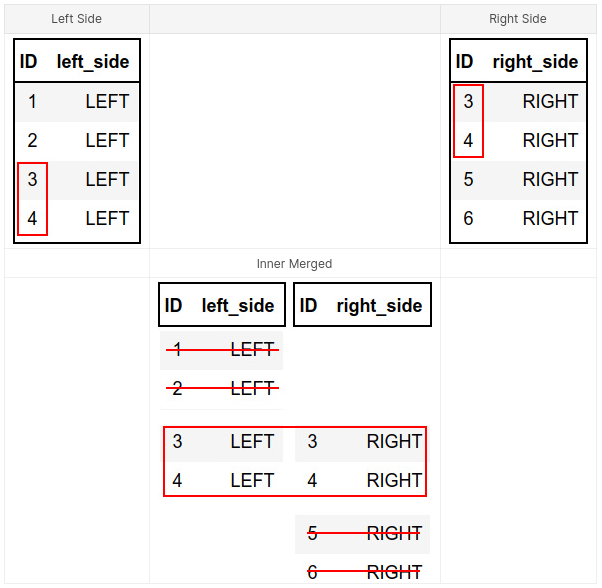

In [52]:
# Unificando os DataFrames "left_dataframe" e "right_dataframe"
merge_dataframe = pd.merge(
    left = left_dataframe, 
    right = right_dataframe,
    on = 'ID',
    how = 'inner'    
)# Aplicando a função pandas "merge com inner"
display(merge_dataframe)

,ID,left_side,right_side
0,3,LEFT,RIGHT
1,4,LEFT,RIGHT


## outer merge

* Mantem os dados de dois dataframes, colocando NaN nas linhas faltantes.

In [55]:
# Unificando os DataFrames "left_dataframe" e "right_dataframe"
merge_dataframe = pd.merge(
    left = left_dataframe, 
    right = right_dataframe,
    on = 'ID',
    how = 'outer'    
)# Aplicando a função pandas "merge com outer"
display(merge_dataframe)

,ID,left_side,right_side
0,1,LEFT,NaN
1,2,LEFT,NaN
2,3,LEFT,RIGHT
3,4,LEFT,RIGHT
4,5,NaN,RIGHT
5,6,NaN,RIGHT


## <center> Resumo dos Tipos de Merge </center>

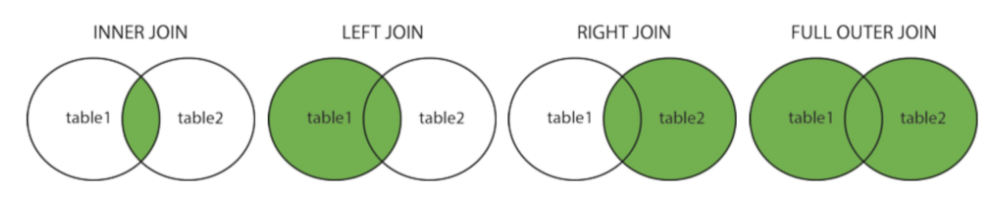

## Parametros ``merge`` do ``left_on`` e ``right_on``

* Parametro utilizado para aplicar o merge quando não existe colunas em comum nos dataframes ( especificar colunas )

In [56]:
# Aplicando o merge quanddo não houver colunas em comum 
#pd.merge(
#    left = left_dataframe,
#   right = right_dataframe,
#    left_on = 'left_col',
#    right_on = 'right_col',
#  how = 'inner')

## ``pivot_table`` Pandas

* Crie uma tabela dinâmica em estilo de planilha como um DataFrame. Os níveis na tabela dinâmica serão armazenados em objetos MultiIndex (índices hierárquicos) no índice e nas colunas do DataFrame de resultado.

In [95]:
# Carregando dataframe para exemplificação
df3 = pd.read_csv('titanic_train.csv')
df3.drop(['Unnamed: 0', 'PassengerId'], inplace=True, axis=1)
display(df3.head())
print(df3.shape)

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,0,1,0.2750,0.014151,0,0,1,0.1,1,0,0,0,0,0,1
1,1,0,0.4750,0.139136,1,0,0,0.1,1,0,0,0,1,0,0
2,1,0,0.3250,0.015469,0,0,1,0.0,0,0,0,1,0,0,1
3,1,0,0.4375,0.103644,1,0,0,0.1,1,0,0,0,0,0,1
4,0,1,0.4375,0.015713,0,0,1,0.0,1,0,0,0,0,0,1


(792, 15)


In [115]:
# Gerando uma Tabela Dinamica "sexo como index"
df_sex = pd.pivot_table(data = df3, index = ['Sex'], aggfunc = 'count')
display(df_sex)

,Age,Emb_1,Emb_2,Emb_3,Family_size,Fare,Pclass_1,Pclass_2,Pclass_3,Survived,Title_1,Title_2,Title_3,Title_4
Sex,,,,,,,,,,,,,,
0,279,279,279,279,279,279,279,279,279,279,279,279,279,279
1,513,513,513,513,513,513,513,513,513,513,513,513,513,513


In [117]:
# Gerando uma Tabela Dinamica "sexo como index"
df_sex = pd.pivot_table(data = df3, index = ['Sex', 'Pclass_1'])# aggfunc = 'count'
display(df_sex)

Age     Emb_1     Emb_2     Emb_3  Family_size      Fare   
Sex Pclass_1                                                                  
0   0         0.316793  0.121212  0.171717  0.707071     0.139899  0.034520  \
    1         0.412037  0.481481  0.012346  0.493827     0.102469  0.219866   
1   0         0.349112  0.112219  0.092269  0.795511     0.068080  0.027787   
    1         0.496029  0.348214  0.008929  0.642857     0.061607  0.137836   

              Pclass_2  Pclass_3  Survived   Title_1   Title_2   Title_3   
Sex Pclass_1                                                               
0   0         0.353535  0.646465  0.661616  0.368687  0.005051  0.000000  \
    1         0.000000  0.000000  0.962963  0.444444  0.037037  0.000000   
1   0         0.236908  0.763092  0.139651  0.925187  0.000000  0.074813   
    1         0.000000  0.000000  0.366071  0.982143  0.000000  0.017857   

               Title_4  
Sex Pclass_1            
0   0         0.626263  
    1         0.518519  
1   0         0.000000  
    1         0.000000

In [119]:
# Gerando uma tabela dinamica com maisde uma coluna senbdo indexada
df_pivotTable = pd.pivot_table(df3, index = ['Sex', 'Pclass_1'], aggfunc = {'Age':np.mean, 'Survived':np.sum})
# obtendo a "media em Age" e a "soma em Survived"
display(df_pivotTable)

Age  Survived
Sex Pclass_1                    
0   0         0.316793       131
    1         0.412037        78
1   0         0.349112        56
    1         0.496029        41

In [123]:
# Utilizando o parametro "values" para obter a media 
df_table = pd.pivot_table(df3, index = ['Sex', 'Pclass_1'], values=[ 'Survived'], aggfunc = np.mean)
display(df_table)

Survived
Sex Pclass_1          
0   0         0.661616
    1         0.962963
1   0         0.139651
    1         0.366071

## ``pivot`` DataFrame Pandas

* Retornar DataFrame remodelado organizado por determinados valores de índice/coluna. Remodele os dados (produza uma tabela “pivot”) com base nos valores das colunas. Usos valores exclusivos de índice / colunas especificados para formar eixos do DataFrame resultante.

In [114]:
# Gerando uma Tabela Dinamica "sexo como index"
# df_pivot = pd.pivot(df, columns= ['col'])
# display(df_pivot)

# <center> Exemplos </center>

In [64]:
# 1º - Carregando DataFrames para exemplificação
df_ratings = pd.read_csv('rating_final.csv')
display(df_ratings.sample(5))
print(df_ratings.shape)

,userID,placeID,rating,food_rating,service_rating
879,U1137,132951,2,2,2
735,U1062,135038,0,0,0
658,U1111,132877,1,1,1
679,U1101,135027,2,1,1
908,U1061,132921,1,2,1


(1161, 5)


In [65]:
# 2º - Carregando DataFrames para exemplificação
df_parking = pd.read_csv('chefmozparking.csv')
display(df_parking.head())
print(df_parking.shape)

,placeID,parking_lot
0,135111,public
1,135110,none
2,135109,none
3,135108,none
4,135107,none


(702, 2)


In [68]:
# Aplicando "merge"  para unificar os dataframes "df_ratings" e "df_parking"
df_merge_01 = pd.merge(
    left = df_ratings,
    right = df_parking,
    on = 'placeID',
    how = 'left'
)# Manter o dataframe da esquerda "df_ratings" e trazendo o da direita "df_parking"
display(df_merge_01)

,userID,placeID,rating,food_rating,service_rating,parking_lot
0,U1077,135085,2,2,2,public
1,U1077,135038,2,2,1,none
2,U1077,132825,2,2,2,none
3,U1077,135060,1,2,2,none
4,U1068,135104,1,1,2,yes
...,...,...,...,...,...,...
1156,U1043,132630,1,1,1,none
1157,U1011,132715,1,1,0,none
1158,U1068,132733,1,1,0,yes
1159,U1068,132594,1,1,1,public


In [73]:
# criando dataframe para exemplificação
df_customer = pd.DataFrame({
    'id': [1,2,3,4],
    'name': ['Tom', 'Jenny', 'James', 'Dan'],
})
display(df_customer)

# criando dataframe para exemplificação
df_order_2 = pd.DataFrame({
    'id': [2, 2, 4, 4],
    'product': ['A', 'B' ,'A', 'C'],
    'quantity': [31, 21, 20,40],
    'date': pd.date_range('2019-02-24', periods=4, freq='D')
})
display(df_order_2)

,id,name
0,1,Tom
1,2,Jenny
2,3,James
3,4,Dan


,id,product,quantity,date
0,2,A,31,2019-02-24
1,2,B,21,2019-02-25
2,4,A,20,2019-02-26
3,4,C,40,2019-02-27


In [74]:
# Aplicando a função merge com parametro left
pd.merge(df_customer, df_order_2, how='left', on='id')

,id,name,product,quantity,date
0,1,Tom,NaN,NaN,NaT
1,2,Jenny,A,31.0,2019-02-24
2,2,Jenny,B,21.0,2019-02-25
3,3,James,NaN,NaN,NaT
4,4,Dan,A,20.0,2019-02-26
5,4,Dan,C,40.0,2019-02-27


In [75]:
# criando dataframe para exemplificação
df_customer = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['Tom', 'Jenny', 'James', 'Dan'],
})
display(df_customer)

# criando dataframe para exemplificação
df_info = pd.DataFrame({
    'id': [2, 2, 3, 4, 5],
    'age': [31, 21, 20, 40, 70],
    'sex': ['F', 'F', 'M', 'M', 'F']
})
display(df_info)

,id,name
0,1,Tom
1,2,Jenny
2,3,James
3,4,Dan


,id,age,sex
0,2,31,F
1,2,21,F
2,3,20,M
3,4,40,M
4,5,70,F


In [76]:
# Aplicando a função merge com parametro left
pd.merge(df_customer, df_info, how='left', on='id')

,id,name,age,sex
0,1,Tom,NaN,NaN
1,2,Jenny,31.0,F
2,2,Jenny,21.0,F
3,3,James,20.0,M
4,4,Dan,40.0,M


In [79]:
# Aplicando a função merge com o perametro "validate"
#pd.merge(df_customer, df_info, how='left', on='id', validate='1:1')

In [80]:
# Criando dataframes para exemplificação
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), columns=['one', 'two'])

# Criando dataframes para exemplificação
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2),columns=['three', 'four'])

In [84]:
display(df1)
display(df2)

,one,two
0,0,1
1,2,3
2,4,5


,three,four
0,5,6
1,7,8


In [81]:
# Concatenando os dois dataframes por meio do eixo vertical
display(pd.concat([df1, df2], axis=1))

,one,two,three,four
0,0,1,5.0,6.0
1,2,3,7.0,8.0
2,4,5,NaN,NaN


In [82]:
# Concatenando os dois dataframes por meio do eixo horizontal
display(pd.concat([df1, df2], axis=0))

,one,two,three,four
0,0.0,1.0,NaN,NaN
1,2.0,3.0,NaN,NaN
2,4.0,5.0,NaN,NaN
0,NaN,NaN,5.0,6.0
1,NaN,NaN,7.0,8.0


In [85]:
# com o mesmo nome nas colunas:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), columns=['one', 'two'])
df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2),columns=['one', 'two'])
pd.concat([df1, df2], axis=0)

,one,two
0,0,1
1,2,3
2,4,5
0,5,6
1,7,8


In [87]:
df_novo = pd.concat([df1, df2], axis=1)
df_novo

,one,two,one,two
0,0,1,5.0,6.0
1,2,3,7.0,8.0
2,4,5,NaN,NaN


In [88]:
df_novo1 = pd.concat([df1, df2], axis=0)
df_novo1

,one,two
0,0,1
1,2,3
2,4,5
0,5,6
1,7,8
